In [464]:
%run featimp

In [373]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, accuracy_score, f1_score

from sklearn.datasets import load_boston, load_diabetes, load_breast_cancer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import warnings

import matplotlib.pyplot as plt

In [374]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### The plan is to use two cases of Regression datasets and explore feature importance as it pertains to R2 scores and then repeat the same process for a Classification example.

Loading and preping the data:

In [292]:
boston_data = load_boston()
diabetes_data = load_diabetes()
cancer_data = load_breast_cancer()

In [294]:
boston = pd.DataFrame(boston_data.data)
boston.columns = boston_data.feature_names
boston['PRICE'] = boston_data.target

diabetes = pd.DataFrame(diabetes_data.data)
diabetes.columns = diabetes_data.feature_names
diabetes['Target'] = diabetes_data.target

cancer = pd.DataFrame(cancer_data.data)
cancer.columns = cancer_data.feature_names
cancer['Target'] = cancer_data.target

In [297]:
y_bos = boston['PRICE']
X_bos = boston.drop(columns = ['PRICE'])

y_dia = diabetes['Target']
X_dia = diabetes.drop(columns = ['Target'])

y_can = cancer['Target']
X_can = cancer.drop(columns = ['Target'])

#### Initialize RF Regressor and Classifier
random seed set for reproducibility

In [ ]:
RFR = RandomForestRegressor(n_estimators=20,random_state=0)
RFC = RandomForestClassifier(n_estimators=20,random_state=0)

### Boston mRMR:

When doing mRMR, we want to take into account minimal-redundancy-maximal-relevance. In simpler words, we want to choose features based on how much correlation there exists between the features. We are more concerned with the order of the features, than the actual number associated with the metric.

In [367]:
get_mrmr(boston, 'PRICE',6)

,Feature,mRMR
0,LSTAT,0.852914
1,RM,1.274408
2,DIS,0.596404
3,INDUS,0.756133
4,NOX,0.503194
5,ZN,0.596581


### Boston Drop Column Importance:

Here we run drop column feature importance where we drop a column and refit the model, comparing how much the metric has changed. This helps to identify what features can be dropped to simplify the model in order to increase performance and gererality. If there are features with a negative importance, that means that the model will most likely perform slightly better if that feature is dropped. 

In [303]:
column_drop(RFR,X_bos,y_bos,r2_score)

,Dropped Column,Metric Change
0,LSTAT,0.017059
1,RM,0.011125
2,DIS,0.004291
3,INDUS,0.002202
4,CHAS,0.002110
5,PTRATIO,0.001896
6,NOX,0.001856
7,B,0.001842
8,TAX,0.001041
9,CRIM,0.000831


### Boston Permutation Importance:

Performs very similarly to drop column importance, however instead of the refitting the model on very iteration we permute the values within the column and recalculate the metric. Here we are testing how a feature performs comparted to a noise column. Once again, this algorithm allows us to remove features from the model that behave similar to random noise. 

In [350]:
perm = permutation_drop(RFR,X_bos,y_bos,r2_score)
perm

,Permuted Column,Metric Change
0,LSTAT,0.668776
1,RM,0.490058
2,DIS,0.128384
3,NOX,0.045618
4,CRIM,0.041718
5,PTRATIO,0.035054
6,TAX,0.021800
7,AGE,0.015534
8,B,0.012079
9,RAD,0.004892


### Boston Strategy Comparison:

Here the goal is to run all 3 feature importance algorithms from above and compare there performance as the number of features increases. This is done by refitting the model starting with the single most important feature and then adding in the next feature as dictated by the importance order. We do 5-fold cross validation to get metric scores and then take the mean across those scores to get an estimate for model performance.

In [375]:
comp = compare_strategy(RFR,boston,'PRICE',50, r2_score, 'r2')
comp

,Permutation,Drop,mRMR
0,0.128566,0.128566,0.128566
1,0.480192,0.480192,0.480192
2,0.461470,0.461470,0.461470
3,0.521308,0.445039,0.445039
4,0.568402,0.445279,0.488501
5,0.598231,0.512936,0.488722
6,0.588681,0.535871,0.560963
7,0.603634,0.546514,0.562516
8,0.604187,0.577905,0.579126
9,0.588863,0.599188,0.580447


### Boston Strategy Comparison Graph:

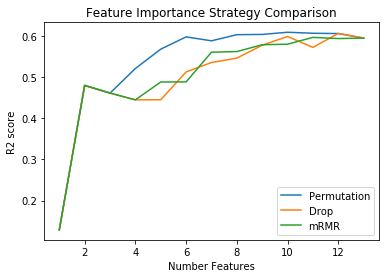

In [334]:
plot_comparison(comp,'R2 score')

### Boston Top-5 Most Important Features:

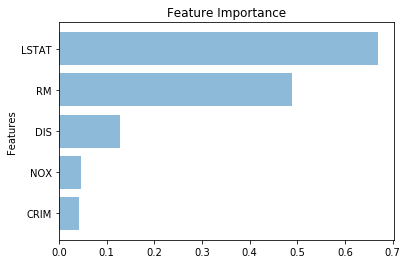

In [353]:
visualize_importance(perm,5)

### Boston Top-5 Features Statistics:

The approach is to use 5-fold cross validation and then take mean for importance and two times the standard deviation for as a "variance".

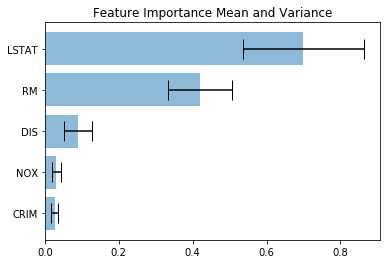

In [333]:
importance_stats(RFR,X_bos,y_bos,r2_score)

## Diabetes Data:

Repeat same code but for another example of regression data.

### Diabetes mRMR:

In [317]:
get_mrmr(diabetes, 'Target',10)

,Feature,mRMR
0,s5,0.589416
1,s3,0.860441
2,s4,0.523583
3,bmi,0.368214
4,bp,0.195285
5,s1,0.082443
6,s2,0.071806
7,s6,0.070735
8,sex,-0.016066
9,age,-0.012019


### Diabetes Drop Column Importance:

In [318]:
column_drop(RFR,X_dia,y_dia,r2_score)

,Dropped Column,Metric Change
0,bmi,0.008863
1,s5,0.003523
2,sex,0.002757
3,bp,0.002544
4,s3,0.002423
5,age,0.002046
6,s2,-0.000505
7,s6,-0.000820
8,s4,-0.003342
9,s1,-0.004984


### Diabetes Permutation Importance:

In [370]:
perm = permutation_drop(RFR,X_dia,y_dia,r2_score)
perm

,Permuted Column,Metric Change
0,bmi,0.545009
1,s5,0.441202
2,bp,0.131760
3,s6,0.095598
4,age,0.089658
5,s3,0.069898
6,s2,0.060376
7,s1,0.053119
8,s4,0.037526
9,sex,0.021052


### Diabetes Top-8 Most Important Features

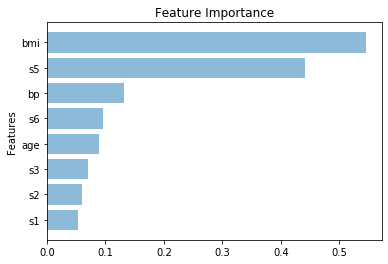

In [371]:
visualize_importance(perm,8)

### Diabetes Top-8 Most Important Feature Statistics

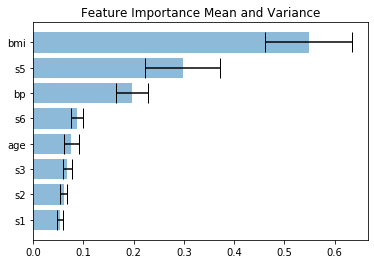

In [372]:
importance_stats(RFR,X_dia,y_dia,r2_score,8)

### Diabetes Feature Importance Stategy Comparison

In [376]:
comp = compare_strategy(RFR,diabetes,'Target',10, r2_score, 'r2')
comp

,Permutation,Drop,mRMR
0,-0.000261,0.134301,-0.000261
1,0.296274,0.296274,0.119513
2,0.354109,0.314537,0.173994
3,0.397311,0.372184,0.308825
4,0.401327,0.389679,0.378081
5,0.391722,0.396061,0.365649
6,0.404094,0.382701,0.357686
7,0.408152,0.408666,0.373785
8,0.393113,0.398857,0.385782
9,0.418416,0.418416,0.418416


### Diabetes Feature Importance Stategy Comparison Graph

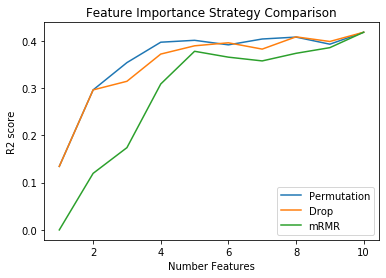

In [339]:
plot_comparison(comp,'R2 score')

## Breat Cancer Data:

Repeat same code but for a Classification problem using accuracy as the metric.

### Breast Cancer mRMR:

In [368]:
get_mrmr(cancer, 'Target',10)

,Feature,mRMR
0,worst perimeter,0.796319
1,smoothness error,0.360942
2,worst area,0.452547
3,worst concave points,0.278199
4,worst texture,0.206116
5,worst radius,0.223295
6,symmetry error,0.183404
7,mean concave points,0.262471
8,mean perimeter,0.214619
9,worst concavity,0.197474


### Breast Cancer Drop Column Importance:

In [341]:
column_drop(RFC,X_can,y_can,accuracy_score)

,Dropped Column,Metric Change
0,worst symmetry,0.003515
1,worst fractal dimension,0.003515
2,mean concavity,0.001757
3,mean concave points,0.001757
4,mean symmetry,0.001757
5,mean fractal dimension,0.001757
6,perimeter error,0.001757
7,concave points error,0.001757
8,worst smoothness,0.001757
9,worst concave points,0.001757


### Breast Cancer Permutation Importance:

In [342]:
perm = permutation_drop(RFC,X_can,y_can,accuracy_score)
perm

,Permuted Column,Metric Change
0,worst concave points,0.014060
1,worst radius,0.005272
2,worst texture,0.005272
3,worst area,0.005272
4,mean texture,0.003515
5,area error,0.003515
6,mean perimeter,0.001757
7,radius error,0.001757
8,perimeter error,0.001757
9,concavity error,0.001757


### Breast Cancer Top-10 Most Important Features:

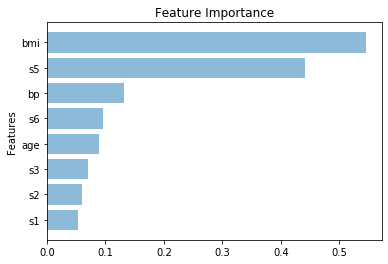

In [378]:
visualize_importance(perm,8)

### Breast Cancer Top-10 Most Important Feature Statistics:

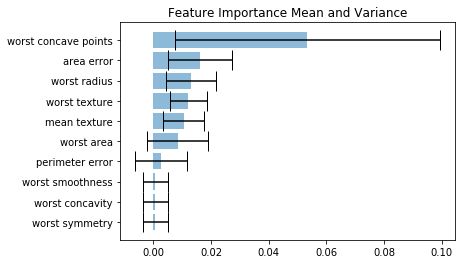

In [379]:
importance_stats(RFC,X_can,y_can,accuracy_score,10)

### Breast Cancer Feature Importance Stategy Comparison

In [377]:
comp = compare_strategy(RFC, cancer,'Target',30, accuracy_score, 'accuracy')
comp

,Permutation,Drop,mRMR
0,0.800077,0.597707,0.885910
1,0.886033,0.662301,0.926402
2,0.945718,0.871843,0.919292
3,0.961462,0.913921,0.945564
4,0.956214,0.924479,0.957922
5,0.954444,0.931589,0.954352
6,0.961524,0.921031,0.961431
7,0.959754,0.922801,0.963232
8,0.956245,0.928172,0.963263
9,0.963232,0.933390,0.956245


### Breast Cancer Feature Importance Stategy Comparison Graph

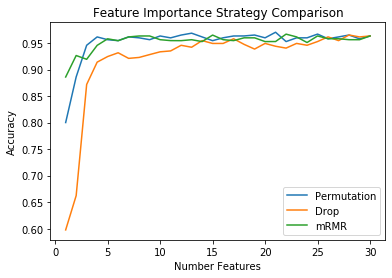

In [380]:
plot_comparison(comp,'Accuracy')

### Automatic Feature Selection:

The way it works automatic feature selection works is that you get a baseline validation metric appropriate for a classifier or a regressor then get the feature importances. Then I drop the lowest importance feature and retrain the model and re-computing the validation metric. If the validation metric is worse, then we have dropped one too many features. 

Below I print the Baseline, then all the features available at that step.  
Next, I print the feature with the lowest feature importance metric and its validation score.  
Finally, the output is a list of features.  

In [465]:
feature_selection(RFR,X_bos,y_bos,permutation_drop, r2_score,'r2')

Baseline Metric:  0.5953157548482901 

Available Features:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Removing feature:  ZN
Validation Metric: 0.6063631696681366 

Available Features:  ['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Removing feature:  CHAS
Validation Metric: 0.6070485813633772 

Available Features:  ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Removing feature:  RAD
Validation Metric: 0.5888629731993628 

Stop!


['LSTAT',
 'B',
 'PTRATIO',
 'TAX',
 'RAD',
 'DIS',
 'AGE',
 'RM',
 'NOX',
 'INDUS',
 'CRIM']

In [458]:
feature_selection(RFR,X_bos,y_bos,column_drop, r2_score,'r2')

Baseline Metric:  0.5953157548482901 

Available Features:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Removing feature:  AGE
Validation Metric: 0.6067549736769614 

Available Features:  ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Removing feature:  INDUS
Validation Metric: 0.5967506754171402 

Available Features:  ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
Removing feature:  CRIM
Validation Metric: 0.5944243353408872 



['LSTAT',
 'B',
 'PTRATIO',
 'TAX',
 'RAD',
 'DIS',
 'RM',
 'NOX',
 'CHAS',
 'ZN',
 'CRIM']

### All features are important!

In [468]:
feature_selection(RFR,X_dia,y_dia,permutation_drop, r2_score,'r2')

Baseline Metric:  0.41841576421861426 

Available Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Removing feature:  sex
Validation Metric: 0.3931127599589103 

Stop!


['s6', 's5', 's4', 's3', 's2', 's1', 'bp', 'bmi', 'sex', 'age']